# Titanic Survival Prediction
Task 1 : Using the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not.

In [4]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
# Reading data

tested_df = pd.read_csv("tested.csv")

In [6]:
tested_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploring dataset

In [7]:
# Getting info about the dataset

tested_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
# Using a describe function to get the description

tested_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Analyzing first 5 data

tested_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Analyzing first 5 data from the bottom

tested_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Analyzing missing data

In [11]:
tested_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# In the output line [21] we can see that Age column has 86 null values and in column cabin we can see that 327 null values are present. Cabin column has about 50% null values so we can drop the column Cabin.
tested_df = tested_df.drop(columns = "Cabin" , axis = 1)

In [13]:
tested_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [14]:
# We need to fill the null values of Age column with mean of Age.

tested_df["Age"].fillna(tested_df["Age"].mean(), inplace=True)
tested_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Checking if there are any null values in the dataset.

tested_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
# We can see that Fare column has 1 null values to filling the null value with mean of fare.

tested_df["Fare"].fillna(tested_df["Fare"].mean(), inplace=True)

In [17]:
# Now again cheching if there are any null values in any columns

tested_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# We have no null values in our dataset

# Data visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

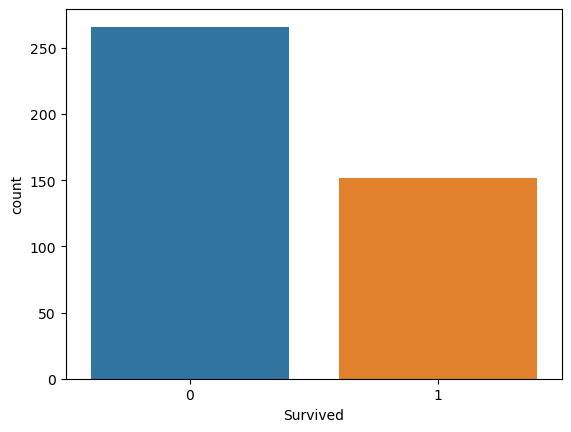

In [19]:
# Analyzing how many passengers survived and how many did not among the total

sns.countplot(x= "Survived",data= tested_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

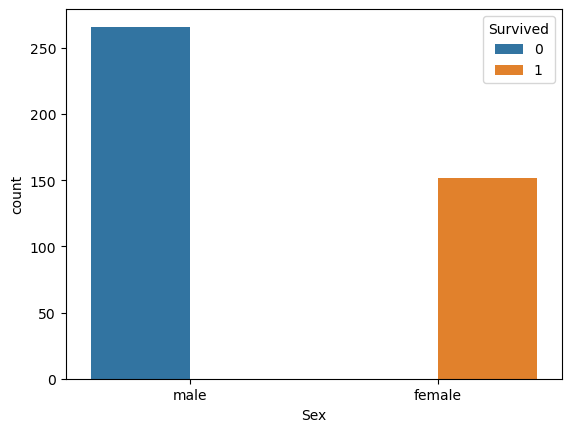

In [20]:
#Analyzing the survival number of male and female

sns.countplot(x='Sex', hue="Survived", data=tested_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

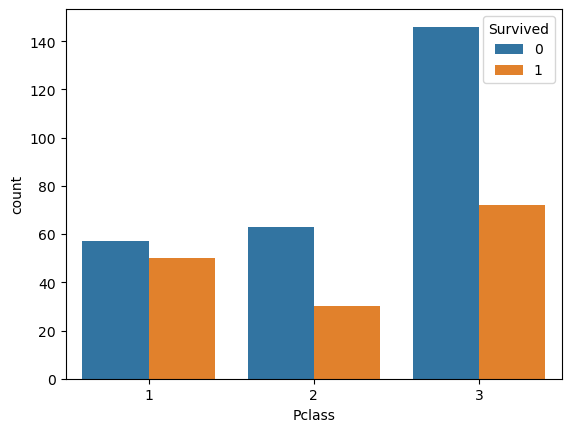

In [21]:
#Analyzing which class passenger survived and which didn't

sns.countplot(x="Pclass",hue="Survived",data=tested_df)

In [25]:
#Encoding the categorical columns

tested_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [24]:
tested_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
#converting categorical columns into numarical columns 

tested_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [28]:
tested_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [31]:
# Separating features and Target

X=tested_df.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y=tested_df['Survived']
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [32]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Spliting the training and test data

In [33]:
 X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


### Model training

In [37]:
#Logestic Regresssion 

model=LogisticRegression()

In [38]:
model.fit(X_train, Y_train)

LogisticRegression()

### Model evaluation

In [40]:
#Accuracy on training data

X_train_prediction=model.predict(X_train)

In [41]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [43]:

training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy score of training data :', training_data_accuracy )

Accuracy score of training data : 1.0


In [44]:
#Accuracy on test data

X_test_prediction=model.predict(X_test)


In [45]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [46]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)

print('Accuracy score of test data :', testing_data_accuracy )

Accuracy score of test data : 1.0
